In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load your dataset
data = pd.read_csv('/content/crop_recommendation.csv')  # Replace with your actual dataset file

# Separate features (X) and labels (y)
X = data.drop('label', axis=1)
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SVM with different kernels
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
for kernel in kernel_list:
    # Create an SVM model with the current kernel
    svm_model = SVC(kernel=kernel)

    # Train the model
    svm_model.fit(X_train_scaled, y_train)

    # Predict on the test set
    y_pred = svm_model.predict(X_test_scaled)

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Kernel: {kernel}, Accuracy: {accuracy}')


Kernel: linear, Accuracy: 0.9772727272727273
Kernel: poly, Accuracy: 0.9204545454545454
Kernel: rbf, Accuracy: 0.9681818181818181
Kernel: sigmoid, Accuracy: 0.7659090909090909


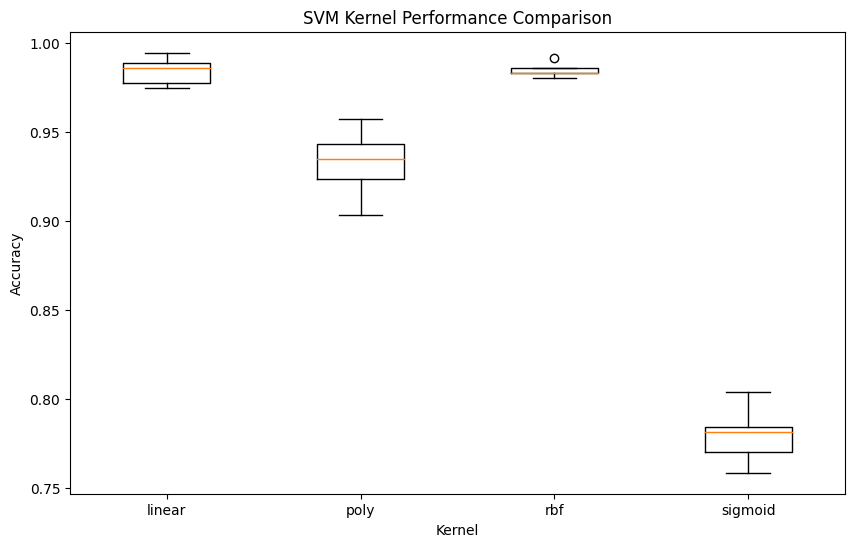

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load your dataset
data = pd.read_csv('/content/crop_recommendation.csv')  # Replace with your actual dataset file

# Separate features (X) and labels (y)
X = data.drop('label', axis=1)
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Explore SVM performance with different kernels using cross-validation
kernel_list = ['linear', 'poly', 'rbf', 'sigmoid']
results = []

for kernel in kernel_list:
    svm_model = SVC(kernel=kernel)
    scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
    results.append(scores)

# Plot the results
plt.figure(figsize=(10, 6))
plt.boxplot(results, labels=kernel_list)
plt.title('SVM Kernel Performance Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Kernel')
plt.show()


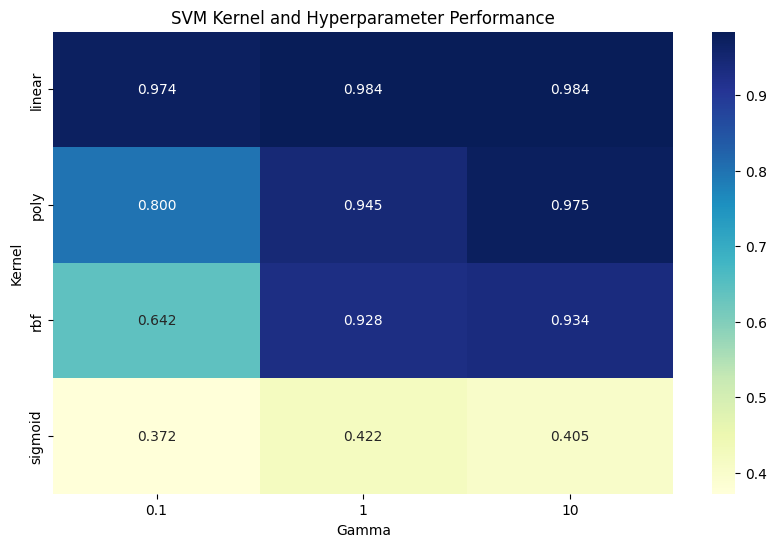

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# Load your dataset
data = pd.read_csv('/content/crop_recommendation.csv')  # Replace with your actual dataset file

# Separate features (X) and labels (y)
X = data.drop('label', axis=1)
y = data['label']

# Split the dataset into training and testing sets
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Explore SVM performance with different kernels and hyperparameters using cross-validation
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': [0.1, 1, 10],
}

results = np.zeros((len(param_grid['kernel']), len(param_grid['C']), len(param_grid['gamma'])))

for idx_kernel, kernel in enumerate(param_grid['kernel']):
    for idx_C, C in enumerate(param_grid['C']):
        for idx_gamma, gamma in enumerate(param_grid['gamma']):
            svm_model = SVC(kernel=kernel, C=C, gamma=gamma)
            scores = cross_val_score(svm_model, X_train_scaled, y_train, cv=5)
            results[idx_kernel, idx_C, idx_gamma] = np.mean(scores)

# Plot the results using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(results.mean(axis=2), annot=True, fmt=".3f", cmap="YlGnBu", xticklabels=param_grid['gamma'], yticklabels=param_grid['kernel'])
plt.title('SVM Kernel and Hyperparameter Performance')
plt.xlabel('Gamma')
plt.ylabel('Kernel')
plt.show()


#  role of hyperparameters in the SVM algorithm

SVM has several hyperparameters that can significantly affect the performance and behavior of the model. Here are a few key hyperparameters and their roles:

Kernel: The choice of kernel determines the type of decision boundary the SVM will learn. Common choices include:

Linear: Suitable for linearly separable data.
Polynomial ('poly'): Useful for data that can be separated by curved boundaries.
Radial basis function ('rbf'): Suitable for non-linearly separable data, as it can capture complex relationships.
Sigmoid: Maps the data to a sigmoid-like function and can be used for non-linear problems.
C (Regularization Parameter): The parameter C controls the trade-off between maximizing the margin and minimizing the classification error. A smaller value of C allows for a larger margin but may tolerate some misclassification. A larger value of C enforces a smaller margin and aims to classify all points correctly.

Gamma (Kernel Coefficient): This parameter is specific to 'poly', 'rbf', and 'sigmoid' kernels. It determines the influence of each training example. A higher gamma value makes the algorithm consider points closer to the decision boundary, which can lead to overfitting. Lower values make the algorithm consider a larger region.

Degree (Polynomial Kernel Degree): This parameter is used only with the 'poly' kernel and controls the degree of the polynomial used in the kernel function. Higher degrees can capture more complex relationships, but they can also lead to overfitting.

Coef0 (Sigmoid Kernel Offset): Relevant only for the 'sigmoid' kernel. It influences how much the model is influenced by the sigmoid shape of the function.